<a href="https://colab.research.google.com/github/pankaj18/forecasting/blob/main/prpphet_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install fbprophet

In [ ]:
from fbprophet import Prophet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
fbprophet.__version__

'0.7.1'

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv")

In [ ]:
print(data.shape)
print(data.head())

(108, 2)
     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587


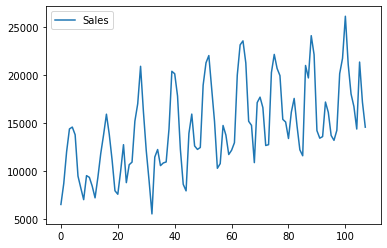

In [ ]:
data.plot()

In [ ]:
data.columns

Index(['Month', 'Sales'], dtype='object')

In [ ]:
data.columns=['ds','y']

In [ ]:
data.head()

,ds,y
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [ ]:
data['ds']=pd.to_datetime(data['ds'])
data.head()

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [ ]:
model=Prophet()

In [ ]:
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=pd.DataFrame()
future['ds']=data['ds'][-12:]

In [ ]:
# check data for last 12 months
y_pred=model.predict(future)

In [ ]:
y_true=data['y'][-12:].values
y_pred1=y_pred['yhat'].values

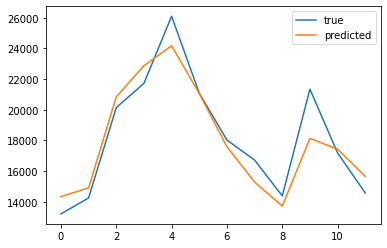

In [ ]:
plt.plot(y_true,label='true')
plt.plot(y_pred1,label='predicted')
plt.legend()

In [ ]:
future=model.make_future_dataframe(periods=12,freq='M')

In [ ]:
future.tail()

,ds
115,1969-07-31
116,1969-08-31
117,1969-09-30
118,1969-10-31
119,1969-11-30


In [ ]:
forecast=model.predict(future)

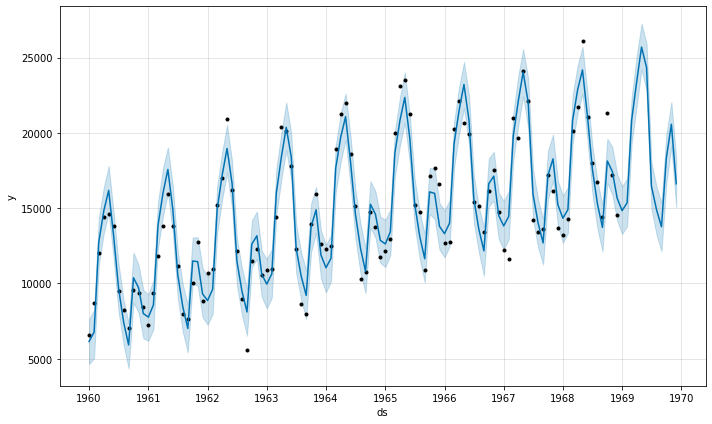

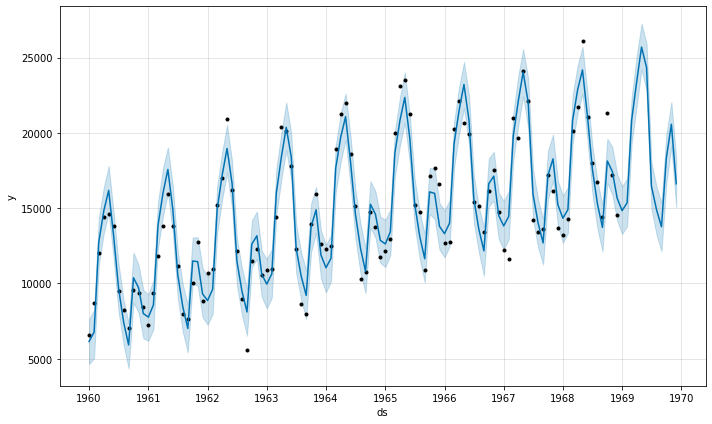

In [ ]:
model.plot(forecast)

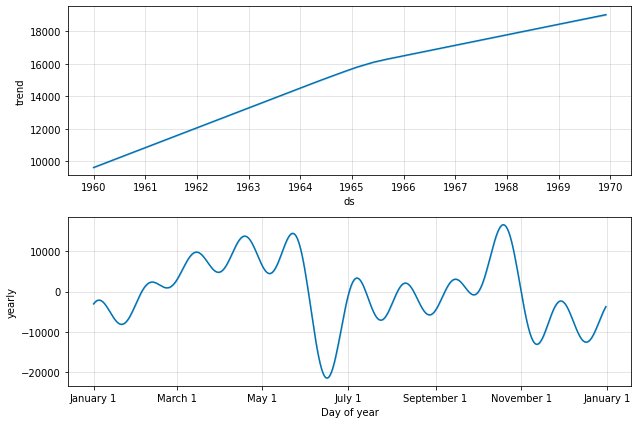

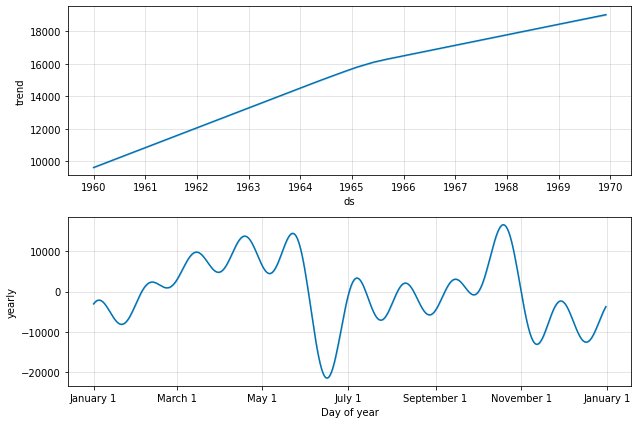

In [ ]:
model.plot_components(forecast)